In [ ]:
# Generate a neural network classifier for the MNIST dataset using Keras.
# Include all necessary preprocessing, model architecture, training, evaluation,
# and visualization (confusion matrix, classification report, accuracy/loss plots).

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping



# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8789 - loss: 0.4275
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9647 - loss: 0.1214
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9760 - loss: 0.0785
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9826 - loss: 0.0571
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9878 - loss: 0.0431
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1013
Test accuracy: 0.9733999967575073


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9842 - val_loss: 0.0491
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9930 - loss: 0.0239 - val_accuracy: 0.9874 - val_loss: 0.0369
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9947 - loss: 0.0206 - val_accuracy: 0.9860 - val_loss: 0.0416
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9955 - loss: 0.0155 - val_accuracy: 0.9848 - val_loss: 0.0475
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9860 - val_loss: 0.0443


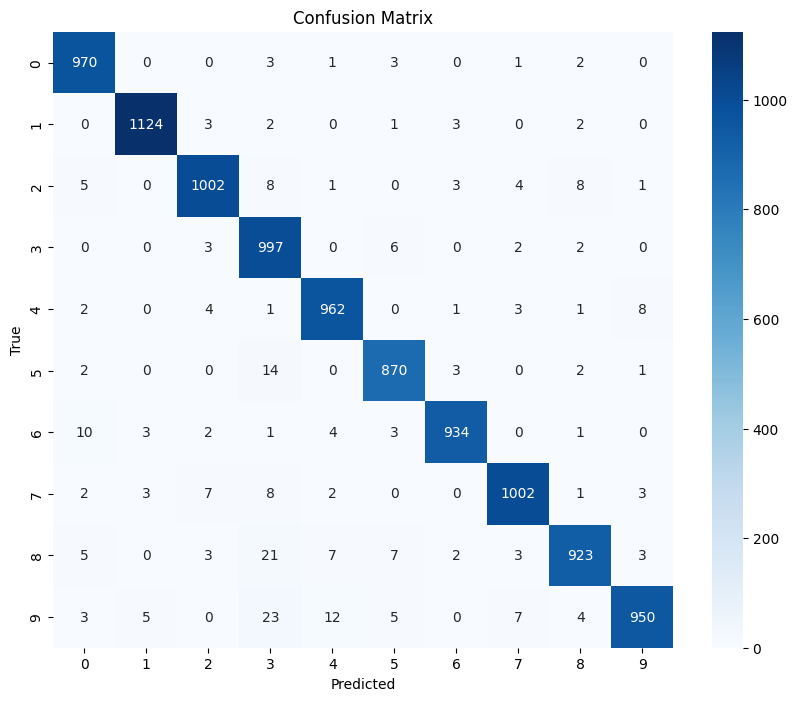

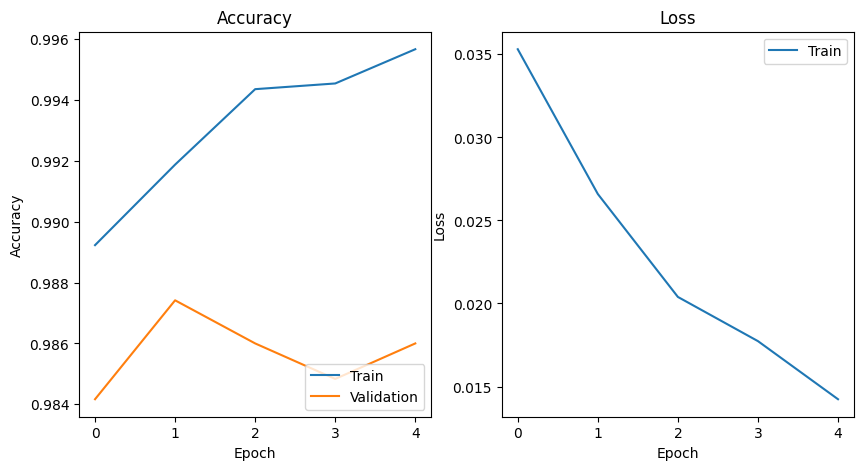

In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate a confusion matrix
# Convert y_test to class labels for compatibility with predicted_labels
y_test_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_labels, predicted_labels)

# Generate a classification report
class_report = classification_report(y_test_labels, predicted_labels)

# When fitting your model, store the history
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,  # or validation_data=(X_val, y_val)
    epochs=5
)


# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.title('Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


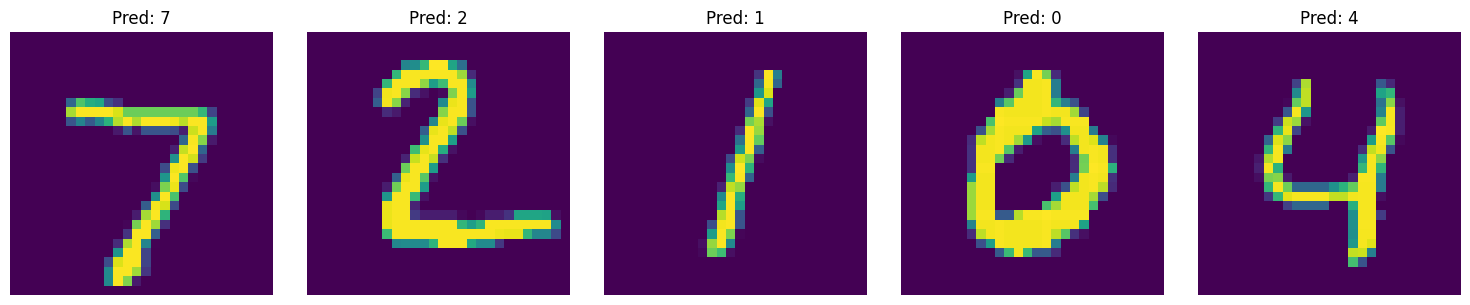

In [ ]:
# Select multiple samples
num_samples = 5
samples = x_test[:num_samples]

# Get predictions
predictions = model.predict(samples)
predicted_classes = np.argmax(predictions, axis=1)

# Plot results (for image data)
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_test[i])  # Adjust based on your data type
    plt.title(f'Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()